# 1.Pandas中的缺失值

1. 缺失值配置选项
    - 将`inf`和`-inf`当作`NA`
        - `pandas.options.mod.use_inf_as_na = True`
2. 检测缺失值
    - `pd.isna()`,`.isna()`
    - `pd.notna()`,`.notna()`
3. 缺失值填充
    - `.fillna()`
    - `.ffill()`
    - `.bfill()`
4. 缺失值删除
    - `.dropna()`

In [3]:
import numpy as np
import pandas as pd

In [4]:
# 数据: `df`
df = pd.DataFrame(np.random.randn(5, 3), 
                  index = ['a', 'c', 'e', 'f', 'h'],
                  columns = ['one', 'two', 'three'])
df['four'] = 'bar'
df['five'] = df['one'] > 0
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df2

,one,two,three,four,five
a,-0.370719,0.615553,0.686897,bar,False
b,NaN,NaN,NaN,NaN,NaN
c,2.176152,1.942063,-1.497354,bar,True
d,NaN,NaN,NaN,NaN,NaN
e,-0.118747,-0.516712,-0.666011,bar,False
f,1.364033,-0.698340,0.537486,bar,True
g,NaN,NaN,NaN,NaN,NaN
h,-0.281588,0.866312,0.435901,bar,False


### 1.1检测缺失值

In [3]:
pd.isna(df2['one'])

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

In [4]:
df2['one'].isna()

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

In [5]:
df2['four'].notna()

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: four, dtype: bool

In [6]:
pd.notna(df['four'])

a    True
c    True
e    True
f    True
h    True
Name: four, dtype: bool

In [7]:
df2.isna()

,one,two,three,four,five
a,False,False,False,False,False
b,True,True,True,True,True
c,False,False,False,False,False
d,True,True,True,True,True
e,False,False,False,False,False
f,False,False,False,False,False
g,True,True,True,True,True
h,False,False,False,False,False


Python中的`None`,  pandas/numpy中的`np.nan`

In [8]:
None == None

True

In [9]:
np.nan == np.nan

False

In [10]:
# np.nan == np.nan得不到想要的结果
df2['one'] == np.nan

a    False
b    False
c    False
d    False
e    False
f    False
g    False
h    False
Name: one, dtype: bool

In [11]:
df2['one'].isna()

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

In [12]:
df2[df2['one'].isna()]

,one,two,three,four,five
b,NaN,NaN,NaN,NaN,NaN
d,NaN,NaN,NaN,NaN,NaN
g,NaN,NaN,NaN,NaN,NaN


In [13]:
df2[df2['one'].notna()]

,one,two,three,four,five
a,-0.820257,-1.075282,-0.788639,bar,False
c,-2.309930,-0.095265,-1.056789,bar,False
e,2.478228,0.020594,0.408703,bar,True
f,0.035253,-0.711021,1.353718,bar,True
h,0.249968,-1.234644,-0.450780,bar,True


### 1.2整数Dtypes和缺失值

* `NaN`是一个浮点数

In [1]:
# pd.Series([1, 2, np.nan, 4], dtype=pd.Int64Dtype())

### 1.3 Datetimes缺失值类型

* `NaT`

In [15]:
df2 = df.copy()
df2['timestamp'] = pd.Timestamp('20120101')
df2.loc[['a', 'c', 'h'], ['one', 'timestamp']] = np.nan
df2

,one,two,three,four,five,timestamp
a,NaN,-1.075282,-0.788639,bar,False,NaT
c,NaN,-0.095265,-1.056789,bar,False,NaT
e,2.478228,0.020594,0.408703,bar,True,2012-01-01
f,0.035253,-0.711021,1.353718,bar,True,2012-01-01
h,NaN,-1.234644,-0.450780,bar,True,NaT


In [16]:
df2.get_dtype_counts()

float64           3
object            1
bool              1
datetime64[ns]    1
dtype: int64

### 1.4 插入缺失值

##### 数值型数据中插入缺失值

In [17]:
s = pd.Series([1, 2, 3])
s.loc[0] = None
s.loc[1] = np.nan
s

0    NaN
1    NaN
2    3.0
dtype: float64

##### 时间类型数据中插入缺失值

In [18]:
s = pd.Series(pd.date_range('2019-01-01', periods = 3, freq = 'D'))
s.loc[0] = None
s.loc[1] = np.nan
s

0          NaT
1          NaT
2   2019-01-03
dtype: datetime64[ns]

##### object类型中插入缺失值

In [19]:
s = pd.Series(['a', 'b', 'c'])
s.loc[0] = None
s.loc[1] = np.nan
s

0    None
1     NaN
2       c
dtype: object

### 1.5 含有缺失值的计算

* 在summing计算中, NaN被当做0处理；
* 如果所有的数据都是NaN, 那么计算结果就是0；
* 累积计算方法`cumsum()`,`cumprod()`会默认忽略NaN, 可以设置`skipna = False`来override这种行为, 将NaN包含进计算中；

In [20]:
a = df2[['one', 'two']]
a

,one,two
a,NaN,-1.075282
c,NaN,-0.095265
e,2.478228,0.020594
f,0.035253,-0.711021
h,NaN,-1.234644


In [21]:
b = df2.iloc[:, :3]
b

,one,two,three
a,NaN,-1.075282,-0.788639
c,NaN,-0.095265,-1.056789
e,2.478228,0.020594,0.408703
f,0.035253,-0.711021,1.353718
h,NaN,-1.234644,-0.450780


In [22]:
a + b

,one,three,two
a,NaN,NaN,-2.150564
c,NaN,NaN,-0.190530
e,4.956456,NaN,0.041188
f,0.070505,NaN,-1.422042
h,NaN,NaN,-2.469288


In [23]:
df2

,one,two,three,four,five,timestamp
a,NaN,-1.075282,-0.788639,bar,False,NaT
c,NaN,-0.095265,-1.056789,bar,False,NaT
e,2.478228,0.020594,0.408703,bar,True,2012-01-01
f,0.035253,-0.711021,1.353718,bar,True,2012-01-01
h,NaN,-1.234644,-0.450780,bar,True,NaT


In [24]:
df2['one'].sum()

2.5134804864510762

In [25]:
df2.iloc[:, :3].cumsum()

,one,two,three
a,NaN,-1.075282,-0.788639
c,NaN,-1.170547,-1.845428
e,2.478228,-1.149953,-1.436725
f,2.513480,-1.860974,-0.083007
h,NaN,-3.095618,-0.533787


In [26]:
df2.iloc[:, :3].cumsum(skipna = False)

,one,two,three
a,NaN,-1.075282,-0.788639
c,NaN,-1.170547,-1.845428
e,NaN,-1.149953,-1.436725
f,NaN,-1.860974,-0.083007
h,NaN,-3.095618,-0.533787


### 1.6 空/NaN 的求和/积

In [27]:
pd.Series([np.nan]).sum()

0.0

In [28]:
pd.Series([]).sum()

0.0

In [29]:
pd.Series([np.nan]).prod()

1.0

In [30]:
pd.Series([]).prod()

1.0

### 1.7 Group中的NaN

* Group中的NaN分组计算时会自动排除

In [31]:
df = df2.iloc[:, :3]
df

,one,two,three
a,NaN,-1.075282,-0.788639
c,NaN,-0.095265,-1.056789
e,2.478228,0.020594,0.408703
f,0.035253,-0.711021,1.353718
h,NaN,-1.234644,-0.450780


In [32]:
df.groupby('one').mean()

,two,three
one,,
0.035253,-0.711021,1.353718
2.478228,0.020594,0.408703


# 2.缺失值填充

* `.fillna()`填充缺失值
    * `.fillna(value = dict()/Series())`
    * `.where(pd.notna(dff), dict()/Series(), axis = 'columns')`
    * `.fillna(method = 'ffill', limit = None)`
    * `.fillna(method = 'bfill', limit = None)`
    * `.ffill()`
    * `.bfill()`

In [33]:
df2

,one,two,three,four,five,timestamp
a,NaN,-1.075282,-0.788639,bar,False,NaT
c,NaN,-0.095265,-1.056789,bar,False,NaT
e,2.478228,0.020594,0.408703,bar,True,2012-01-01
f,0.035253,-0.711021,1.353718,bar,True,2012-01-01
h,NaN,-1.234644,-0.450780,bar,True,NaT


In [34]:
df2.fillna(0)

,one,two,three,four,five,timestamp
a,0.000000,-1.075282,-0.788639,bar,False,0
c,0.000000,-0.095265,-1.056789,bar,False,0
e,2.478228,0.020594,0.408703,bar,True,2012-01-01 00:00:00
f,0.035253,-0.711021,1.353718,bar,True,2012-01-01 00:00:00
h,0.000000,-1.234644,-0.450780,bar,True,0


In [35]:
df2['one'].fillna('missing')

a      missing
c      missing
e      2.47823
f    0.0352525
h      missing
Name: one, dtype: object

In [36]:
df.fillna(method = 'ffill')

,one,two,three
a,NaN,-1.075282,-0.788639
c,NaN,-0.095265,-1.056789
e,2.478228,0.020594,0.408703
f,0.035253,-0.711021,1.353718
h,0.035253,-1.234644,-0.450780


In [37]:
df.fillna(method = 'bfill', limit = 1)

,one,two,three
a,NaN,-1.075282,-0.788639
c,2.478228,-0.095265,-1.056789
e,2.478228,0.020594,0.408703
f,0.035253,-0.711021,1.353718
h,NaN,-1.234644,-0.450780


In [38]:
df.fillna(method = 'bfill')

,one,two,three
a,2.478228,-1.075282,-0.788639
c,2.478228,-0.095265,-1.056789
e,2.478228,0.020594,0.408703
f,0.035253,-0.711021,1.353718
h,NaN,-1.234644,-0.450780


In [39]:
df.ffill()

,one,two,three
a,NaN,-1.075282,-0.788639
c,NaN,-0.095265,-1.056789
e,2.478228,0.020594,0.408703
f,0.035253,-0.711021,1.353718
h,0.035253,-1.234644,-0.450780


In [40]:
df.bfill()

,one,two,three
a,2.478228,-1.075282,-0.788639
c,2.478228,-0.095265,-1.056789
e,2.478228,0.020594,0.408703
f,0.035253,-0.711021,1.353718
h,NaN,-1.234644,-0.450780


In [41]:
dff = pd.DataFrame(np.random.randn(10, 3), columns = list('ABC'))
dff.iloc[3:5, 0] = np.nan
dff.iloc[4:6, 1] = np.nan
dff.iloc[5:7, 2] = np.nan
dff

,A,B,C
0,0.699942,1.043530,-2.144467
1,0.422811,1.261973,1.599153
2,-0.791029,-0.642086,-1.224638
3,NaN,-1.200654,1.709687
4,NaN,NaN,-1.238400
5,0.328741,NaN,NaN
6,-0.486685,-0.394171,NaN
7,0.105361,-0.593136,-1.619249
8,0.928270,1.190340,0.360470
9,1.450855,1.683684,-0.532213


In [42]:
Mean = dff.mean()
print(Mean)
print(type(Mean))
print(Mean.shape)

A    0.332283
B    0.293685
C   -0.386207
dtype: float64
<class 'pandas.core.series.Series'>
(3,)


In [43]:
dff.fillna(Mean)

,A,B,C
0,0.699942,1.043530,-2.144467
1,0.422811,1.261973,1.599153
2,-0.791029,-0.642086,-1.224638
3,0.332283,-1.200654,1.709687
4,0.332283,0.293685,-1.238400
5,0.328741,0.293685,-0.386207
6,-0.486685,-0.394171,-0.386207
7,0.105361,-0.593136,-1.619249
8,0.928270,1.190340,0.360470
9,1.450855,1.683684,-0.532213


In [44]:
dff.fillna(dff.mean()['B':'C'])

,A,B,C
0,0.699942,1.043530,-2.144467
1,0.422811,1.261973,1.599153
2,-0.791029,-0.642086,-1.224638
3,NaN,-1.200654,1.709687
4,NaN,0.293685,-1.238400
5,0.328741,0.293685,-0.386207
6,-0.486685,-0.394171,-0.386207
7,0.105361,-0.593136,-1.619249
8,0.928270,1.190340,0.360470
9,1.450855,1.683684,-0.532213


In [45]:
dff.where(pd.notna(dff), dff.mean(), axis = 'columns')

,A,B,C
0,0.699942,1.043530,-2.144467
1,0.422811,1.261973,1.599153
2,-0.791029,-0.642086,-1.224638
3,0.332283,-1.200654,1.709687
4,0.332283,0.293685,-1.238400
5,0.328741,0.293685,-0.386207
6,-0.486685,-0.394171,-0.386207
7,0.105361,-0.593136,-1.619249
8,0.928270,1.190340,0.360470
9,1.450855,1.683684,-0.532213


# 3.缺失值删除

* 删除整行
* 删除整列

In [46]:
df['one'] = np.nan
df

,one,two,three
a,NaN,-1.075282,-0.788639
c,NaN,-0.095265,-1.056789
e,NaN,0.020594,0.408703
f,NaN,-0.711021,1.353718
h,NaN,-1.234644,-0.450780


In [47]:
df.dropna(axis = 0)

,one,two,three


In [48]:
df.dropna(axis = 1)

,two,three
a,-1.075282,-0.788639
c,-0.095265,-1.056789
e,0.020594,0.408703
f,-0.711021,1.353718
h,-1.234644,-0.450780


In [49]:
df['one'].dropna()

Series([], Name: one, dtype: float64)

# 4.插值

* `.interpolate(method)`
* `.interpolate().plot()`
* `.interpolate(limit, limit_direction)`

values    68
dtype: int64

values    100
dtype: int64

              values
2000-01-31 -2.514425
2000-02-29 -0.517768
2000-03-31  1.478888
2000-04-28 -0.499480
2000-05-31  1.057344
2000-06-30 -2.063356
2000-07-31 -0.308453
2000-08-31  0.185271
2000-09-29 -0.438396
2000-10-31 -0.715132
2000-11-30 -0.991868
2000-12-29 -0.039393
2001-01-31 -0.017717
2001-02-28  0.003959
2001-03-30 -0.311222
2001-04-30 -0.626403
2001-05-31 -0.941584
2001-06-29 -1.256765
2001-07-31  1.645289
2001-08-31  0.366649
2001-09-28 -0.911991
2001-10-31 -0.399906
2001-11-30 -0.464909
2001-12-31 -0.529913
2002-01-31  0.642285
2002-02-28 -1.143171
2002-03-29 -0.898207
2002-04-30 -0.436479
2002-05-31  2.074808
2002-06-28 -0.563669
...              ...
2005-11-30  0.200676
2005-12-30 -0.037845
2006-01-31 -0.656817
2006-02-28 -1.275788
2006-03-31 -1.219660
2006-04-28  0.281416
2006-05-31  3.285946
2006-06-30 -0.804868
2006-07-31 -0.965736
2006-08-31  1.012568
2006-09-29  0.547214
2006-10-31  0.035685
2006-11-30  0.304572


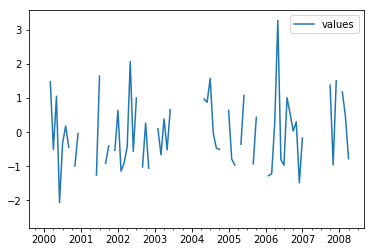

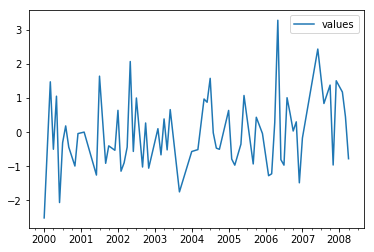

In [25]:
idx = pd.date_range('2000-01-31', periods = 100, freq = 'BM')
ts = pd.DataFrame(np.random.randn(100), index = idx, columns = ['values'])
na_idx = np.random.randint(0, 99, 39)
ts.iloc[na_idx,] = np.nan

print(ts.count())
print()
print(ts.interpolate().count())
print()
print(ts.interpolate())
print()
ts.plot();
ts.interpolate().plot();

              values
2000-01-31 -0.825826
2000-02-29       NaN
2002-07-31 -0.926164
2005-01-31       NaN
2008-04-30  0.049787


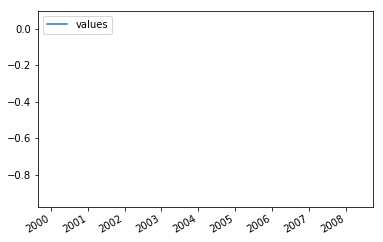

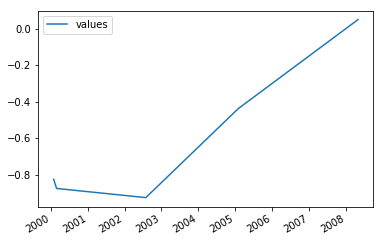

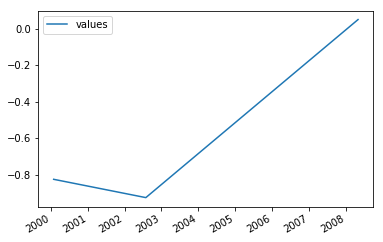

In [29]:
idx2 = pd.to_datetime(['2000-01-31', '2000-02-29', '2002-07-31', '2005-01-31', '2008-04-30'])
ts2 = pd.DataFrame(np.random.randn(5), 
                   index = idx2, 
                   columns = ['values'])
ts2.iloc[1, :] = np.nan
ts2.iloc[3, :] = np.nan
print(ts2)
ts2.plot();
ts2.interpolate().plot();
ts2.interpolate(method = 'time').plot();

In [31]:
ser = pd.DataFrame([0.0, np.nan, 10.0], 
                   index = ['0.0', '1.0', '10.0'], 
                   dtype = np.float64, 
                   columns = [''])
print(ser)
print(ser.interpolate())

          
0.0    0.0
1.0    NaN
10.0  10.0
          
0.0    0.0
1.0    5.0
10.0  10.0


In [36]:
df = pd.DataFrame({
    'A': [1, 2.1, np.nan, 4.7, 5.6, 6.8],
    'B': [0.25, np.nan, np.nan, 4, 12.2, 14.4]
})
print(df)
print()
print(df.interpolate())
print()
print(df.interpolate(method = 'barycentric'))
print(df.interpolate(method = 'pchip'))
df.interpolate(method = 'akima')
df.interpolate(method = 'spline', order = 2)
df.interpolate(method = 'polynomial', order = 2)

     A      B
0  1.0   0.25
1  2.1    NaN
2  NaN    NaN
3  4.7   4.00
4  5.6  12.20
5  6.8  14.40

     A      B
0  1.0   0.25
1  2.1   1.50
2  3.4   2.75
3  4.7   4.00
4  5.6  12.20
5  6.8  14.40

      A       B
0  1.00   0.250
1  2.10  -7.660
2  3.53  -4.515
3  4.70   4.000
4  5.60  12.200
5  6.80  14.400
         A          B
0  1.00000   0.250000
1  2.10000   0.672808
2  3.43454   1.928950
3  4.70000   4.000000
4  5.60000  12.200000
5  6.80000  14.400000


,A,B
0,1.000000,0.250000
1,2.100000,-2.703846
2,3.451351,-1.453846
3,4.700000,4.000000
4,5.600000,12.200000
5,6.800000,14.400000


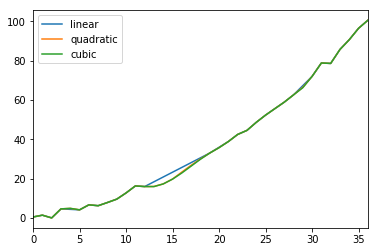

In [101]:
np.random.seed(2)
ser = pd.Series(np.arange(1, 10.1, 0.25) ** 2 + np.random.randn(37))
bad = np.array([4, 13, 14, 15, 16, 17, 18, 20, 29])
ser[bad] = np.nan
methods = ['linear', 'quadratic', 'cubic']
df = pd.DataFrame({
    m: ser.interpolate(method = m) for m in methods
})
df.plot();

In [117]:
ser = pd.Series(np.sort(np.random.uniform(size = 100)))
new_index = ser.index | pd.Index([49.25, 49.25, 49.75, 50.25, 50.5, 50.75])
interp_s = ser.reindex(new_index)
interp_s = interp_s.interpolate(method = 'pchip')
interp_s[49:51]

49.00    0.570628
49.25    0.573126
49.25    0.573126
49.75    0.576541
50.00    0.577516
50.25    0.578114
50.50    0.578526
50.75    0.578908
51.00    0.579417
dtype: float64

In [21]:
ser = pd.Series([np.nan, np.nan, 5, np.nan, np.nan, np.nan, 13, np.nan, np.nan])
ser.interpolate()
ser.interpolate(limit = 1)
ser.interpolate(limit = 1, limit_direction = 'backward')
ser.interpolate(limit = 1, limit_direction = 'both')
ser.interpolate(limit_direction = 'both')
ser.interpolate(limit_direction = 'both', limit_area = 'inside', limit = 1)
ser.interpolate(limit_direction = 'backward', limit_area = 'outside')
ser.interpolate(limit_direction = 'both', limit_area = 'outside')

0     5.0
1     5.0
2     5.0
3     NaN
4     NaN
5     NaN
6    13.0
7    13.0
8    13.0
dtype: float64

# 5.替换

* `.replace()`
* `.replace(, method = '')`
* `.replace(, inplace = True)`

#### 5.1 通用值替换

In [60]:
ser = pd.Series([0.0, 1.0, 2.0, 3.0, 4.0])

# value
ser.replace(0, 5)

0    5.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [61]:
# value list
ser.replace([0.0, 1.0, 2.0, 3.0, 4.0], [4, 3, 2, 1, 0])

0    4.0
1    3.0
2    2.0
3    1.0
4    0.0
dtype: float64

In [62]:
# value dict
ser.replace({0: 10, 1: 100})

0     10.0
1    100.0
2      2.0
3      3.0
4      4.0
dtype: float64

In [63]:
df = pd.DataFrame({
    'a': [0, 1, 2, 3, 4],
    'b': [5, 6, 7, 8, 9]
})
# value dict
df.replace({
    'a': 0, 
    'b': 7
}, 100)

,a,b
0,100,5
1,1,6
2,2,100
3,3,8
4,4,9


In [64]:
# value list interpolate
ser.replace([1, 2, 3], method = 'pad')

0    0.0
1    0.0
2    0.0
3    0.0
4    4.0
dtype: float64

#### 5.2 正则表达式替换

In [65]:
d = {
    'a': list(range(4)),
    'b': list('ab..'),
    'c': ['a', 'b', np.nan, 'd']
}
df = pd.DataFrame(d)
df

,a,b,c
0,0,a,a
1,1,b,b
2,2,.,NaN
3,3,.,d


In [66]:
df.replace('.', np.nan)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [67]:
df.replace(r'\s*\.\s*', np.nan, regex = True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [68]:
df.replace(['a', '.'], ['b', np.nan])

,a,b,c
0,0,b,b
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [69]:
df.replace([r'\.', r'(a)'], ['dot', '\1stuff'], regex = True)

,a,b,c
0,0,stuff,stuff
1,1,b,b
2,2,dot,NaN
3,3,dot,d


#### 5.3 数值替换

In [70]:
df=  pd.DataFrame(np.random.randn(10, 2))
df[np.random.rand(df.shape[0]) > 0.5] = 1.5
df

,0,1
0,0.242067,-0.427669
1,1.500000,1.500000
2,-1.541596,-0.954546
3,1.500000,1.500000
4,-0.777863,-0.800687
5,1.297203,-0.417352
6,-0.171180,0.922204
7,1.500000,1.500000
8,1.216928,-0.801365
9,1.500000,1.500000


In [71]:
df.replace(1.5, np.nan)

,0,1
0,0.242067,-0.427669
1,NaN,NaN
2,-1.541596,-0.954546
3,NaN,NaN
4,-0.777863,-0.800687
5,1.297203,-0.417352
6,-0.171180,0.922204
7,NaN,NaN
8,1.216928,-0.801365
9,NaN,NaN


In [72]:
df00 = df.iloc[0, 0]
df.replace([1.5, df00], 
           [np.nan, 'a'])

,0,1
0,a,-0.427669
1,NaN,NaN
2,-1.5416,-0.954546
3,NaN,NaN
4,-0.777863,-0.800687
5,1.2972,-0.417352
6,-0.17118,0.922204
7,NaN,NaN
8,1.21693,-0.801365
9,NaN,NaN


In [73]:
print(df)
df.replace(1.5, np.nan, inplace = True)
print(df)

          0         1
0  0.242067 -0.427669
1  1.500000  1.500000
2 -1.541596 -0.954546
3  1.500000  1.500000
4 -0.777863 -0.800687
5  1.297203 -0.417352
6 -0.171180  0.922204
7  1.500000  1.500000
8  1.216928 -0.801365
9  1.500000  1.500000
          0         1
0  0.242067 -0.427669
1       NaN       NaN
2 -1.541596 -0.954546
3       NaN       NaN
4 -0.777863 -0.800687
5  1.297203 -0.417352
6 -0.171180  0.922204
7       NaN       NaN
8  1.216928 -0.801365
9       NaN       NaN


In [74]:
s = pd.Series(np.random.randn(5), index = [0, 2, 4, 6, 7])
s > 0

0     True
2    False
4     True
6    False
7    False
dtype: bool

In [75]:
(s > 0).dtype

dtype('bool')

In [76]:
crit = (s > 0).reindex(list(range(8)))
crit

0     True
1      NaN
2    False
3      NaN
4     True
5      NaN
6    False
7    False
dtype: object

In [77]:
crit.dtype

dtype('O')

In [78]:
reindexed = s.reindex(list(range(8))).fillna(0)
# reindexed[crit]
reindexed[crit.fillna(False)]

0    0.260045
4    0.278137
dtype: float64

In [79]:
reindexed[crit.fillna(True)]

0    0.260045
1    0.000000
3    0.000000
4    0.278137
5    0.000000
dtype: float64

In [80]:
s = pd.Series([0, 1, np.nan, 3, 4], dtype = 'Int64')
s

0      0
1      1
2    NaN
3      3
4      4
dtype: Int64